<a href="https://colab.research.google.com/github/codrae/CU-BEMS/blob/main/cu_bems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

E: Could not get lock /var/lib/dpkg/lock-frontend. It is held by process 7356 (apt-get)
N: Be aware that removing the lock file is not a solution and may break your system.
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), is another process using it?
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 14 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: sk

In [2]:
# 나눔바른고딕 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# matplotlib에서 한글 폰트 사용 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 설치된 나눔 폰트를 matplotlib에 설정
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=12)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt


In [5]:
path = "/content/drive/MyDrive/ATG/2019Floor7.csv"
df = pd.read_csv(path)
df.head(5)

,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),...,z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux)
0,2019-01-01 00:00:00,0.0,0.0,0.01,0.0,0.0,0.13,NaN,NaN,NaN,...,0.01,NaN,NaN,NaN,0.0,0.0,0.08,NaN,NaN,NaN
1,2019-01-01 00:01:00,0.0,0.0,0.01,0.0,0.0,0.12,NaN,NaN,NaN,...,0.01,NaN,NaN,NaN,0.0,0.0,0.08,NaN,NaN,NaN
2,2019-01-01 00:02:00,0.0,0.0,0.01,0.0,0.0,0.13,NaN,NaN,NaN,...,0.01,NaN,NaN,NaN,0.0,0.0,0.08,NaN,NaN,NaN
3,2019-01-01 00:03:00,0.0,0.0,0.01,0.0,0.0,0.12,NaN,NaN,NaN,...,0.01,NaN,NaN,NaN,0.0,0.0,0.08,NaN,NaN,NaN
4,2019-01-01 00:04:00,0.0,0.0,0.01,0.0,0.0,0.12,NaN,NaN,NaN,...,0.01,NaN,NaN,NaN,0.0,0.0,0.08,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          525600 non-null  object 
 1   z1_AC1(kW)    521187 non-null  float64
 2   z1_AC2(kW)    521187 non-null  float64
 3   z1_AC3(kW)    521187 non-null  float64
 4   z1_AC4(kW)    495812 non-null  float64
 5   z1_Light(kW)  523056 non-null  float64
 6   z1_Plug(kW)   524823 non-null  float64
 7   z1_S1(degC)   424101 non-null  float64
 8   z1_S1(RH%)    424103 non-null  float64
 9   z1_S1(lux)    424103 non-null  float64
 10  z2_AC1(kW)    495807 non-null  float64
 11  z2_Light(kW)  523056 non-null  float64
 12  z2_Plug(kW)   522708 non-null  float64
 13  z2_S1(degC)   424704 non-null  float64
 14  z2_S1(RH%)    424703 non-null  float64
 15  z2_S1(lux)    424700 non-null  float64
 16  z3_Light(kW)  523836 non-null  float64
 17  z3_Plug(kW)   522368 non-null  float64
 18  z4_A

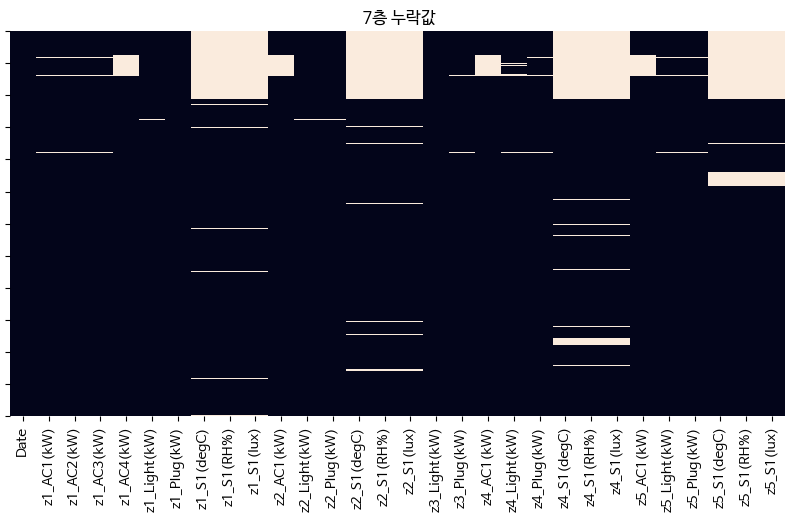

In [8]:
num_ticks = 13
plt.figure( figsize = ( 10 , 5 ))
ax = sns.heatmap( df.isnull( ) , cbar = False , yticklabels = [ ' Jul18 ' , ' Aug18 ' , ' Sept18 ' , ' Oct18 ' , ' Nov18 ' , ' Dec18 ' , ' Jan19 ' , ' Feb19 ' , 'Mar19' , 'Apr19' , ' May19' , 'Jun19' , '' ])
ax.set_yticks( np.linspace ( 0 , 525600 , num_ticks , dtype = int ) )
ax.set_title( ' 7층 누락값' )
plt.show ( )

In [9]:
print(df.columns)


Index(['Date', 'z1_AC1(kW)', 'z1_AC2(kW)', 'z1_AC3(kW)', 'z1_AC4(kW)',
       'z1_Light(kW)', 'z1_Plug(kW)', 'z1_S1(degC)', 'z1_S1(RH%)',
       'z1_S1(lux)', 'z2_AC1(kW)', 'z2_Light(kW)', 'z2_Plug(kW)',
       'z2_S1(degC)', 'z2_S1(RH%)', 'z2_S1(lux)', 'z3_Light(kW)',
       'z3_Plug(kW)', 'z4_AC1(kW)', 'z4_Light(kW)', 'z4_Plug(kW)',
       'z4_S1(degC)', 'z4_S1(RH%)', 'z4_S1(lux)', 'z5_AC1(kW)', 'z5_Light(kW)',
       'z5_Plug(kW)', 'z5_S1(degC)', 'z5_S1(RH%)', 'z5_S1(lux)'],
      dtype='object')


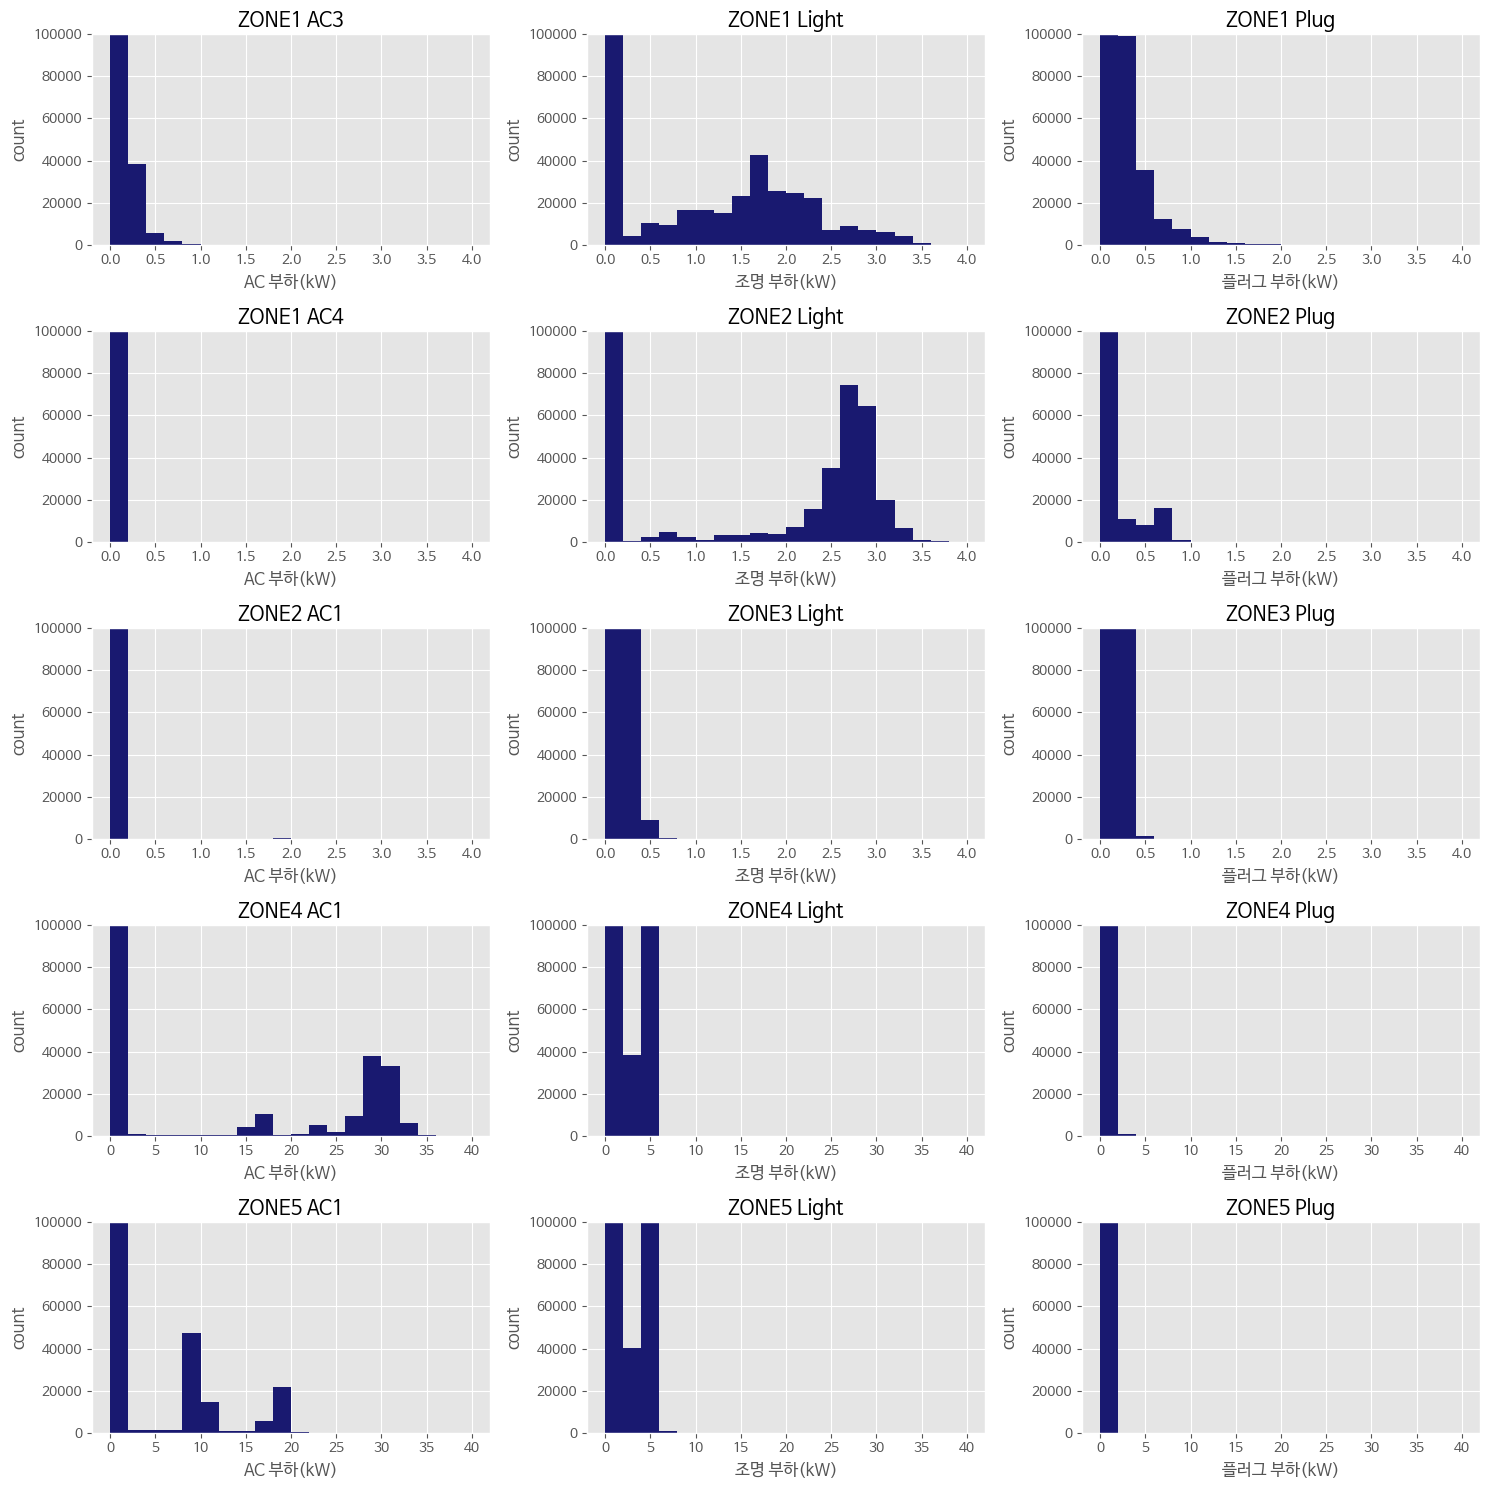

In [10]:

# Y 제한 설정 (Floor 1~7에 대해 설정)
ylim = [4, 4, 4, 40, 40, 40, 40]
b = 20  # 빈의 개수 설정

# 제목 설정
title1A  =  [ 'z1_AC3(kW)',  'z1_AC4(kW)', 'z2_AC1(kW)', 'z4_AC1(kW)', 'z5_AC1(kW)' ]
title2A  =  [ 'ZONE1 AC3',  'ZONE1 AC4',  'ZONE2 AC1',  'ZONE4 AC1',  'ZONE5 AC1' ]
title1L  =  [ 'z1_Light(kW)',  'z2_Light(kW)',  'z3_Light(kW)', 'z4_Light(kW)', 'z5_Light(kW)' ]
title2L  =  [ 'ZONE1 Light',  'ZONE2 Light',  'ZONE3 Light',  'ZONE4 Light', 'ZONE5 Light' ]
title1P  =  [ 'z1_Plug(kW)',  'z2_Plug(kW)',  'z3_Plug(kW)', 'z4_Plug(kW)', 'z5_Plug(kW)' ]
title2P  =  [ 'ZONE1 Plug',  'ZONE2 Plug',  'ZONE3 Plug',  'ZONE4 Plug',  'ZONE5 Plug' ]

# 5행 3열의 하위 플롯을 만듭니다.
plt.style.use('ggplot')
fig, axs = plt.subplots(len(title1A), 3, figsize=(15, 15), gridspec_kw={'width_ratios': [1, 1, 1]}, tight_layout=True)

# 5개 구역의 AC 장치에 대한 히스토그램을 플롯합니다.
for i in np.arange(len(title1A)):
    axs[i, 0].hist(df[title1A[i]], bins=b, range=[0, ylim[i]], color='midnightblue')
    axs[i, 0].set_title(title2A[i])
    axs[i, 0].set_ylim([0, 100000])
    axs[i, 0].set_xlabel('AC 부하(kW)')
    axs[i, 0].set_ylabel('count')

# 5개 구역의 조명 부하에 대한 히스토그램을 플롯합니다.
for i in np.arange(len(title1L)):
    axs[i, 1].hist(df[title1L[i]], bins=b, range=[0, ylim[i]], color='midnightblue')
    axs[i, 1].set_title(title2L[i])
    axs[i, 1].set_ylim([0, 100000])
    axs[i, 1].set_xlabel('조명 부하(kW)')
    axs[i, 1].set_ylabel('count')

# 모든 5개 구역의 플러그 부하에 대한 히스토그램을 플롯합니다.
for i in np.arange(len(title1P)):
    axs[i, 2].hist(df[title1P[i]], bins=b, range=[0, ylim[i]], color='midnightblue')
    axs[i, 2].set_title(title2P[i])
    axs[i, 2].set_ylim([0, 100000])
    axs[i, 2].set_xlabel('플러그 부하(kW)')
    axs[i, 2].set_ylabel('count')

# 플롯을 보여줍니다.
plt.show()


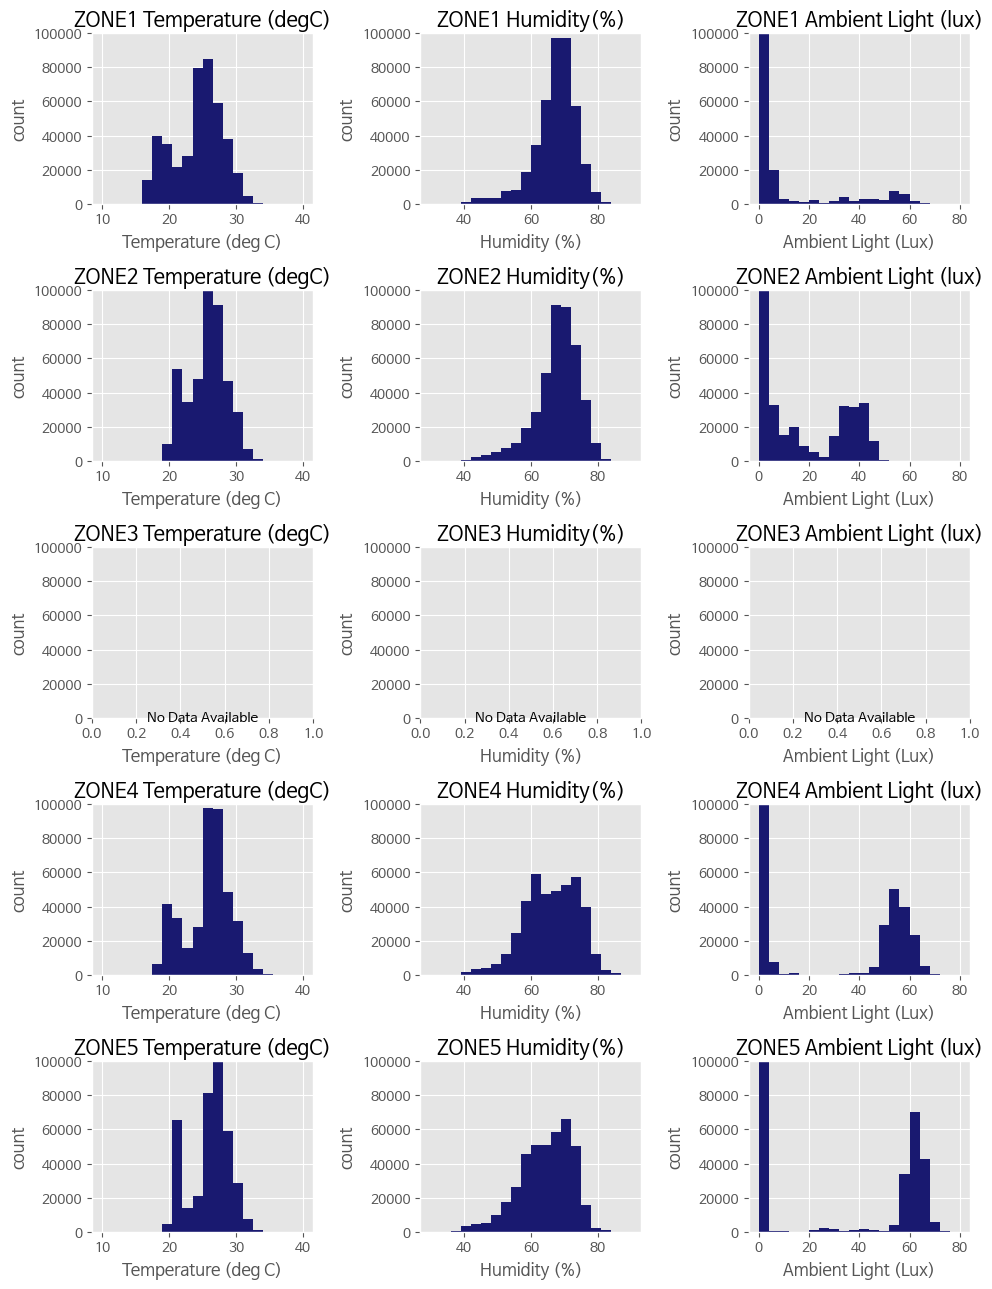

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 가정: 데이터 프레임 df가 이미 로드되어 있음

# 빈의 개수 설정
b = 20

# 제목 설정
title1T = ['z1_S1(degC)', 'z2_S1(degC)', 'z3_S1(degC)', 'z4_S1(degC)', 'z5_S1(degC)']
title2T = ['ZONE1 Temperature (degC)', 'ZONE2 Temperature (degC)', 'ZONE3 Temperature (degC)', 'ZONE4 Temperature (degC)', 'ZONE5 Temperature (degC)']
title1H = ['z1_S1(RH%)', 'z2_S1(RH%)', 'z3_S1(RH%)', 'z4_S1(RH%)', 'z5_S1(RH%)']
title2H = ['ZONE1 Humidity(%)', 'ZONE2 Humidity(%)', 'ZONE3 Humidity(%)', 'ZONE4 Humidity(%)', 'ZONE5 Humidity(%)']
title1I = ['z1_S1(lux)', 'z2_S1(lux)', 'z3_S1(lux)', 'z4_S1(lux)', 'z5_S1(lux)']
title2I = ['ZONE1 Ambient Light (lux)', 'ZONE2 Ambient Light (lux)', 'ZONE3 Ambient Light (lux)', 'ZONE4 Ambient Light (lux)', 'ZONE5 Ambient Light (lux)']

# 5행 3열의 하위 플롯을 만듭니다.
plt.style.use('ggplot')
fig, axs = plt.subplots(len(title1T), 3, figsize=(10, 13), gridspec_kw={'width_ratios': [1, 1, 1]}, tight_layout=True)

# 모든 구역의 온도 데이터에 대한 히스토그램을 플롯합니다.
for i in np.arange(len(title1T)):
    try:
        axs[i, 0].hist(df[title1T[i]], bins=b, range=[10, 40], color='midnightblue')
    except KeyError:
        axs[i, 0].text(0.5, 0.5, 'No Data Available', ha='center', va='center')
    axs[i, 0].set_title(title2T[i])
    axs[i, 0].set_ylim([0, 100000])
    axs[i, 0].set_xlabel('Temperature (deg C)')
    axs[i, 0].set_ylabel('count')

# 모든 구역의 습도 데이터에 대한 히스토그램을 플롯합니다.
for i in np.arange(len(title1H)):
    try:
        axs[i, 1].hist(df[title1H[i]], bins=b, range=[30, 90], color='midnightblue')
    except KeyError:
        axs[i, 1].text(0.5, 0.5, 'No Data Available', ha='center', va='center')
    axs[i, 1].set_title(title2H[i])
    axs[i, 1].set_ylim([0, 100000])
    axs[i, 1].set_xlabel('Humidity (%)')
    axs[i, 1].set_ylabel('count')

# 모든 구역의 조도 데이터에 대한 히스토그램을 플롯합니다.
for i in np.arange(len(title1I)):
    try:
        axs[i, 2].hist(df[title1I[i]], bins=b, range=[0, 80], color='midnightblue')
    except KeyError:
        axs[i, 2].text(0.5, 0.5, 'No Data Available', ha='center', va='center')
    axs[i, 2].set_title(title2I[i])
    axs[i, 2].set_ylim([0, 100000])
    axs[i, 2].set_xlabel('Ambient Light (Lux)')
    axs[i, 2].set_ylabel('count')

# 플롯을 보여줍니다.
plt.show()


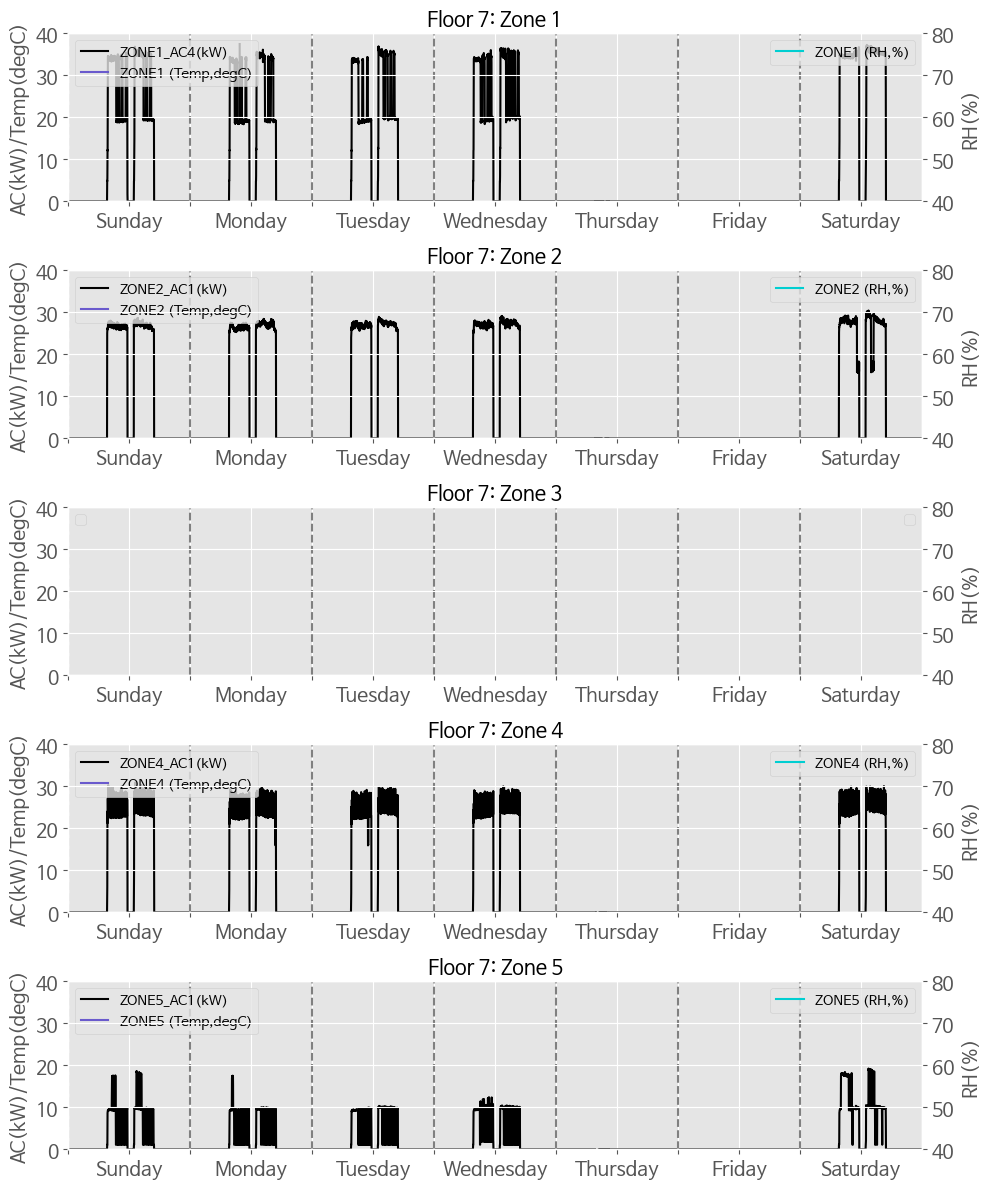

In [28]:
# Select which week to plot (n=0-51)
n = 1
xrange = (1440*7*n, 1440*7*(n+1))  # One day has 1440 minutes, so we plot the data for one week (7 days)
ylim1 = (0, 40)  # Set Y-axis1 limit
ylim2 = (40, 80)  # Set Y-axis2 limit

# The following data columns will be plotted
title_AC = ['z1_AC4(kW)', 'z2_AC1(kW)', '', 'z4_AC1(kW)', 'z5_AC1(kW)']
label_AC = ['ZONE1_AC4(kW)', 'ZONE2_AC1(kW)', '', 'ZONE4_AC1(kW)', 'ZONE5_AC1(kW)']
title_temp = ['z1_S1(degC)', 'z2_S1(degC)', 'z3_S1(degC)', 'z4_S1(degC)', 'z5_S1(degC)']
label_temp = ['ZONE1 (Temp,degC)', 'ZONE2 (Temp,degC)', 'ZONE3 (Temp,degC)', 'ZONE4 (Temp,degC)', 'ZONE5 (Temp,degC)']
title_RH = ['z1_S1(RH%)', 'z2_S1(RH%)', 'z3_S1(RH%)', 'z4_S1(RH%)', 'z5_S1(RH%)']
label_RH = ['ZONE1 (RH,%)', 'ZONE2 (RH,%)', 'ZONE3 (RH,%)', 'ZONE4 (RH,%)', 'ZONE5 (RH,%)']

# These are the titles to be set for each plot
title = ['Floor 7: Zone 1', 'Floor 7: Zone 2', 'Floor 7: Zone 3', 'Floor 7: Zone 4', 'Floor 7: Zone 5']

# Create five subplots
plt.style.use('ggplot')
fig, axs = plt.subplots(len(title), figsize=(10, 12), tight_layout=True)
plt.setp(axs, xticks=np.arange(14)*720+1440*7*n,  # xtick at every 12 hours.
         xticklabels=['', 'Sunday', '', 'Monday', '', 'Tuesday', '', 'Wednesday', '', 'Thursday', '', 'Friday', '', 'Saturday'])

# Plot
for i, ax1 in enumerate(axs.flat):
    # Check if the AC column exists before plotting
    if title_AC[i] and title_AC[i] in df.columns:
        ax1.plot(df[title_AC[i]], color='black', label=label_AC[i])  # Plot AC based on the column heading

    # Check if the temperature column exists before plotting
    if title_temp[i] in df.columns:
        ax1.plot(df[title_temp[i]], color='slateblue', label=label_temp[i])  # Plot temperature readings based on the column heading

    ax1.set_xlim(xrange)
    ax1.set_ylim(ylim1)
    ax1.set_ylabel('AC(kW)/Temp(degC)', fontsize=14)
    ax1.set_title(title[i])
    ax1.tick_params(axis='both', which='major', labelsize=14)

    ax2 = ax1.twinx()  # Create the secondary axis

    # Check if the RH column exists before plotting
    if title_RH[i] in df.columns:
        ax2.plot(df[title_RH[i]], color='darkturquoise', label=label_RH[i])  # Plot RH readings based on the column heading

    ax2.set_ylim(ylim2)
    ax2.set_ylabel('RH(%)', fontsize=14)
    ax2.tick_params(axis='both', which='major', labelsize=14)

    # Add legends to both axes
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Draw vertical dash line
for i in np.arange(7)*1440+1440*7*n:
    for ax in axs.flat:
        ax.axvline(x=i, color='grey', linestyle='--')

# Show the plot
plt.show()


KeyError: 'z3_S1(lux)'

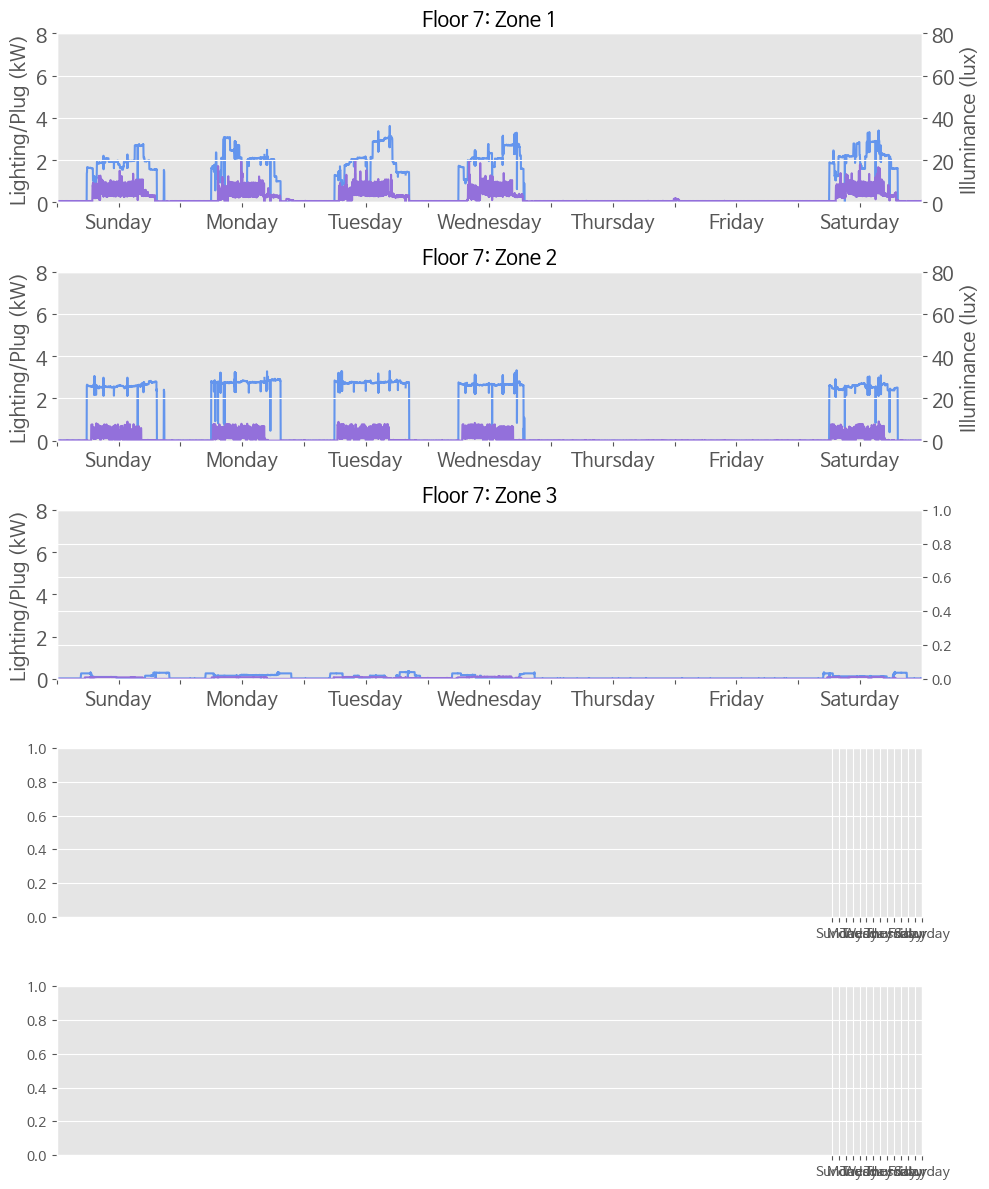

In [30]:
n=8
xrange=(1440*7*n,1440*7*n+1440*7)
yrange=(0,12)
ylim2=(0,80)

title_light = ['z1_Light(kW)','z2_Light(kW)','z3_Light(kW)','z4_Light(kW)','z5_Light(kW)']
title_plug = ['z1_Plug(kW)','z2_Plug(kW)','z3_Plug(kW)','z4_Plug(kW)','z5_Plug(kW)']
title_lux = ['z1_S1(lux)','z2_S1(lux)','z3_S1(lux)','z4_S1(lux)','z5_S1(lux)']
title = ['Floor 7: Zone 1','Floor 7: Zone 2','Floor 7: Zone 3','Floor 7: Zone 4','Floor 7: Zone 5']

plt.style.use('ggplot')
fig, axs = plt.subplots(len(title), figsize=(10,12), tight_layout=True)
plt.setp(axs, xticks=np.arange(14)*720+1440*7*n,
         xticklabels=['','Sunday','', 'Monday','','Tuesday','','Wednesday','','Thursday','','Friday','','Saturday'])

i=0
for ax1 in axs.flat:
  ax1.plot(df[title_light[i]], color='cornflowerblue')
  ax1.plot(df[title_plug[i]], color='mediumpurple')
  ax1.set_xlim(xrange)
  ax1.set_ylim(0,8)
  ax1.grid(False)
  ax1.set_ylabel('Lighting/Plug (kW)', fontsize=14)
  ax1.tick_params(axis='both', which ='major', labelsize=14)
  ax1.set_title(title[i])

  ax2 = ax1.twinx()
  ax2.plot(df[title_lux[i]], color='orange')
  ax2.set_ylim(ylim2)
  ax2.set_ylabel('Illuminance (lux)', fontsize=14)
  ax2.tick_params(axis='both', which ='major', labelsize=14)
  i=i+1

for i in np.arange(7)*1440+1440*7*n:
  for ax in axs.flat:
    ax.axvline(x=i, color='grey',linestyle='--')

In [36]:
df.columns

Index(['Date', 'z1_AC1(kW)', 'z1_AC2(kW)', 'z1_AC3(kW)', 'z1_AC4(kW)',
       'z1_Light(kW)', 'z1_Plug(kW)', 'z1_S1(degC)', 'z1_S1(RH%)',
       'z1_S1(lux)', 'z2_AC1(kW)', 'z2_Light(kW)', 'z2_Plug(kW)',
       'z2_S1(degC)', 'z2_S1(RH%)', 'z2_S1(lux)', 'z3_Light(kW)',
       'z3_Plug(kW)', 'z4_AC1(kW)', 'z4_Light(kW)', 'z4_Plug(kW)',
       'z4_S1(degC)', 'z4_S1(RH%)', 'z4_S1(lux)', 'z5_AC1(kW)', 'z5_Light(kW)',
       'z5_Plug(kW)', 'z5_S1(degC)', 'z5_S1(RH%)', 'z5_S1(lux)'],
      dtype='object')

In [37]:
df = df.fillna(0)
df['Floor7Sum'] = df['z1_AC1(kW)']+df['z1_AC2(kW)']+df['z1_AC3(kW)']+df['z1_AC4(kW)']+df['z1_Light(kW)']+df['z1_Plug(kW)']+df['z2_AC1(kW)']+df['z2_Light(kW)']+df['z2_Plug(kW)']+df['z3_Light(kW)']+df['z3_Plug(kW)']+df['z4_AC1(kW)']+df['z4_Light(kW)']+df['z4_Plug(kW)']+df['z5_AC1(kW)']+df['z5_Light(kW)']+df['z5_Plug(kW)']

Text(0.5, 1.0, 'Floor 7 Load (kW)')

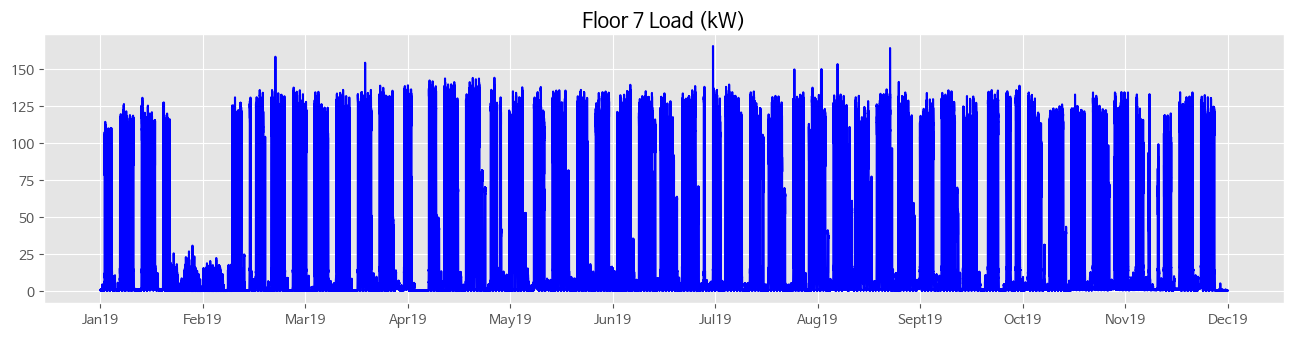

In [38]:
labels=['Jan19','Feb19','Mar19','Apr19','May19','Jun19','Jul19','Aug19','Sept19','Oct19','Nov19','Dec19',]
ticks= np.linspace(0,525600,12)
plt.figure(figsize=(16,3.5))
ax = df['Floor7Sum'].plot(color='blue')#, ylim=(0,200))
plt.xticks(ticks,labels)
ax.set_title('Floor 7 Load (kW)')

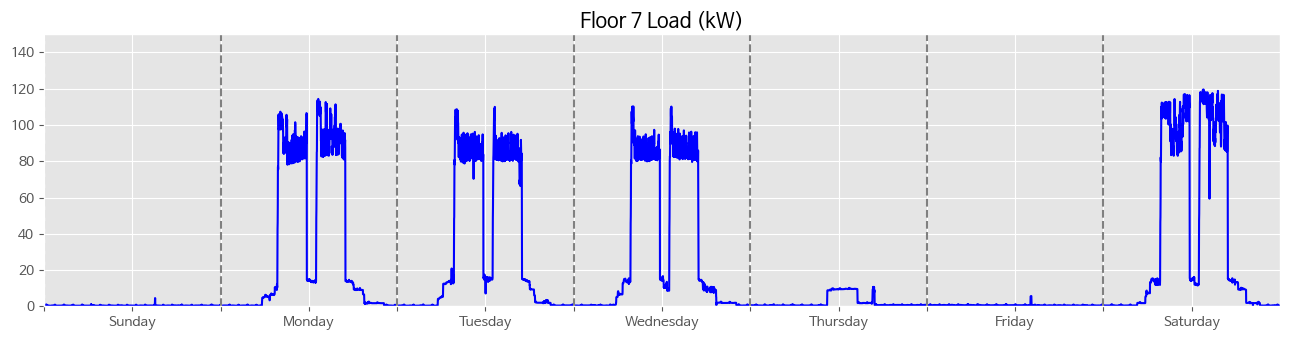

In [39]:
# We can also plot a selected week for data visualization.
n=0 #n=week, ranging from 0-51
xrange=(1440*7*n,1440*7*n+1440*7)
yrange=(0,150)
ticks = np.arange(14)*720+1440*7*n
labels = ['','Sunday','', 'Monday','','Tuesday','','Wednesday','','Thursday','','Friday','','Saturday']
plt.style.use('ggplot')
plt.figure(figsize=(13,3.5), tight_layout=True)
plt.xticks(ticks, labels)
ax = df['Floor7Sum'].plot(color='blue', xlim=xrange, ylim=yrange)
ax.set_title('Floor 7 Load (kW)')

for i in np.arange(7)*1440+1440*7*n:
  ax.axvline(x=i, color='grey',linestyle='--')

In [40]:
# We can also save the sum to a CSV file, using the command below.
df.to_csv ('Floor7.csv')